## 볼린저 밴드(Bollinger Bands) :최근 2년

In [ ]:
# 구성 요소	의미
# MA20	20일 이동평균선
# Upper	MA20 + 2 * 표준편차 → 상단 밴드
# Lower	MA20 - 2 * 표준편차 → 하단 밴드
# 채워진 회색 영역	가격이 정상 범위 내에서 움직이는 구간 강조

In [ ]:
# window = 20
# 의미: 볼린저 밴드 계산에 사용할 이동 평균 기간을 설정합니다.
# 일반적으로 20일(1개월 기준)이 자주 사용됩니다.

#     df['MA20'] = df['종가'].rolling(window).mean()
# ‘종가’ 열에 대해 20일 이동 평균을 계산합니다.
# rolling(20)은 현재 날짜로부터 과거 20일 간의 데이터를 기준으로 계산하는 이동 윈도우를 의미합니다.
# 결과는 새로운 열 MA20에 저장됩니다.

# MA20[30] = mean(종가[11:30])
# df['STD20'] = df['종가'].rolling(window).std()
# 20일 간의 표준편차 (Standard Deviation) 를 계산합니다.
# 이는 가격의 변동성(위아래로 얼마나 흔들리는지)을 측정하는 데 사용됩니다.
# 결과는 STD20이라는 새 열에 저장됩니다.

# ✅ df['Upper'] = df['MA20'] + 2 * df['STD20']
# 볼린저 밴드의 상단선을 계산합니다.
# 공식: Upper Band = 이동평균 + 2 * 표준편차
# 상단 밴드는 통계적으로 가격이 95% 이상 위쪽으로 벗어나기 어려운 구간을 나타냅니다.

# ✅ df['Lower'] = df['MA20'] - 2 * df['STD20']
# 볼린저 밴드의 하단선을 계산합니다.

# 공식: Lower Band = 이동평균 - 2 * 표준편차
# 하단 밴드는 가격이 아래로 크게 하락하지 않도록 잡아주는 지지선 역할을 합니다.

## 삼성전자 

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\pykrx\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


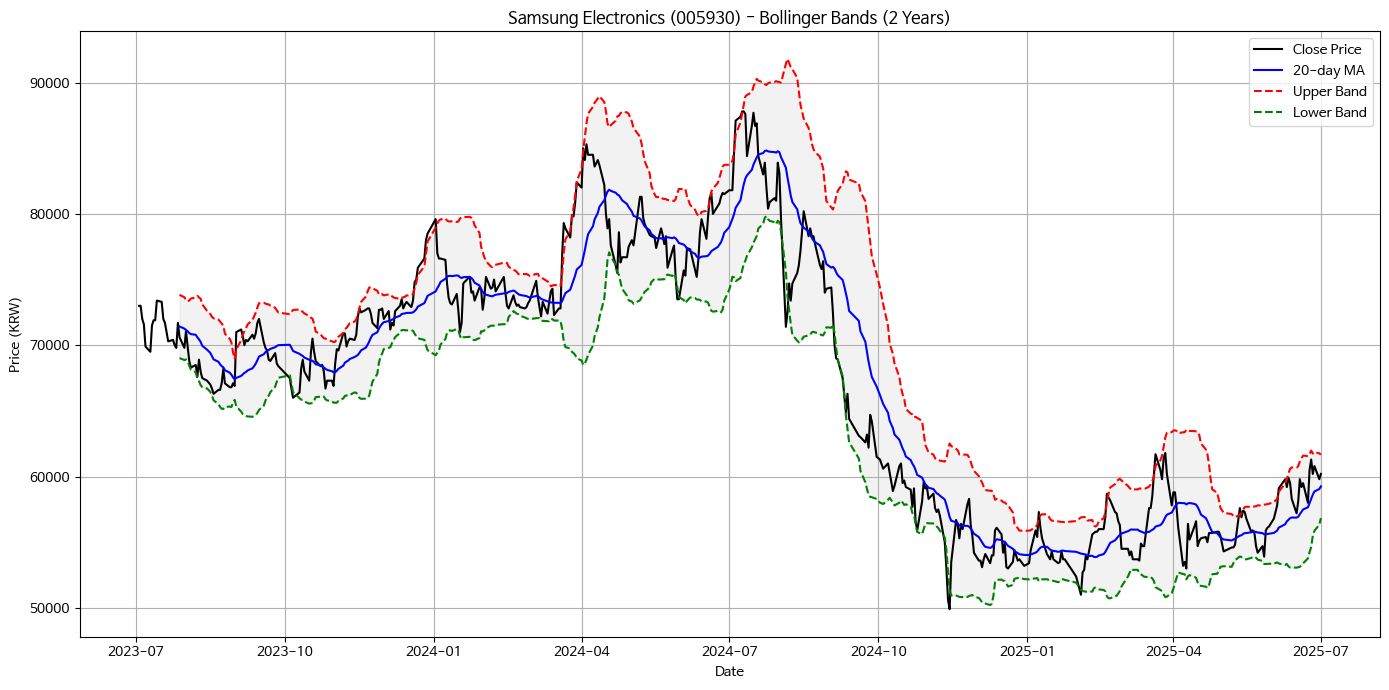

In [1]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 날짜 범위 설정 (최근 2년)
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. 삼성전자(005930) 시세 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 3. 날짜 인덱스를 datetime 형태로 변환
df.index = pd.to_datetime(df.index)

# 4. 볼린저 밴드 계산
window = 20  # 기준일 수 (20일)
df['MA20'] = df['종가'].rolling(window).mean()
df['STD20'] = df['종가'].rolling(window).std()
df['Upper'] = df['MA20'] + 2 * df['STD20']
df['Lower'] = df['MA20'] - 2 * df['STD20']

# 5. 시각화
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['종가'], label='Close Price', color='black')
plt.plot(df.index, df['MA20'], label='20-day MA', color='blue')
plt.plot(df.index, df['Upper'], label='Upper Band', color='red', linestyle='--')
plt.plot(df.index, df['Lower'], label='Lower Band', color='green', linestyle='--')

# 밴드 영역 채우기
plt.fill_between(df.index, df['Upper'], df['Lower'], color='gray', alpha=0.1)

plt.title('Samsung Electronics (005930) - Bollinger Bands (2 Years)')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 2024.01.01부터 최근 

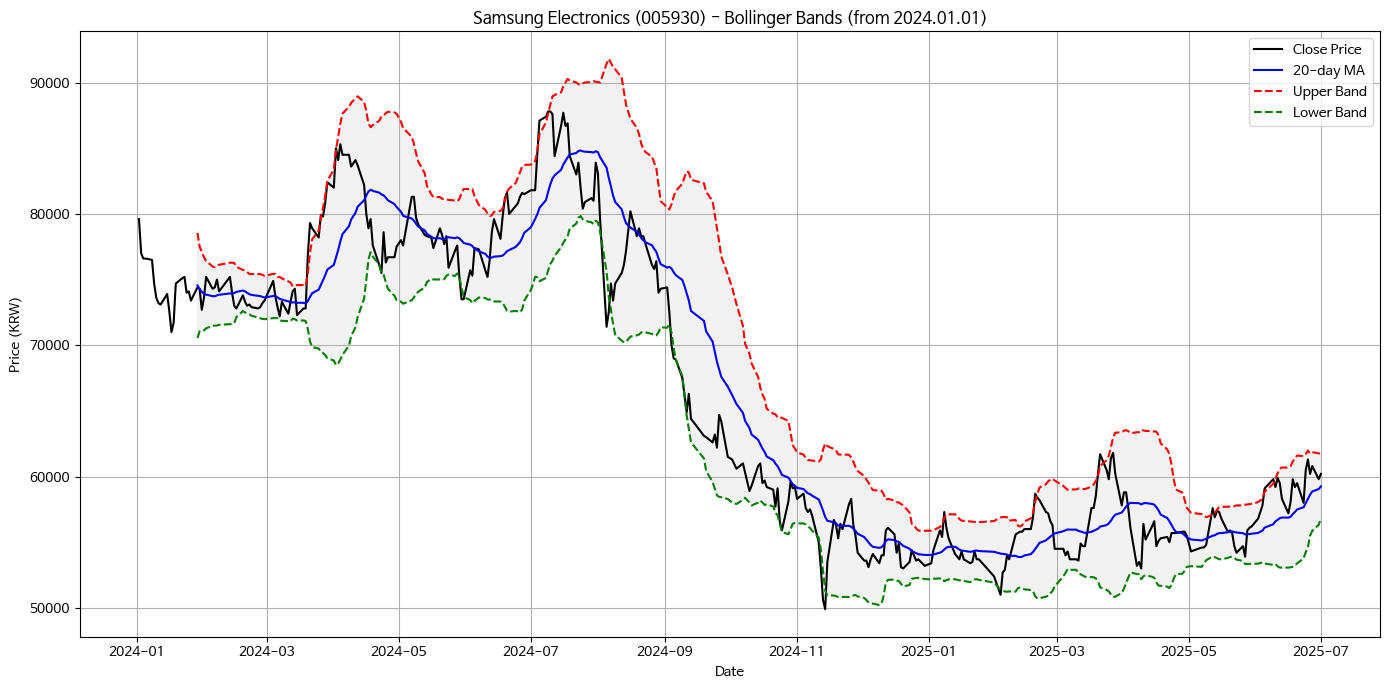

In [18]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. 날짜 범위 설정 (2024년 1월 1일부터 오늘까지)
start_date = '20240101'
end_date = datetime.today().strftime('%Y%m%d')

# 2. 삼성전자(005930) 시세 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 3. 날짜 인덱스를 datetime 형태로 변환
df.index = pd.to_datetime(df.index)

# 4. 볼린저 밴드 계산 (20일 이동 평균 ± 2 * 표준편차)
window = 20
df['MA20'] = df['종가'].rolling(window).mean()
df['STD20'] = df['종가'].rolling(window).std()
df['Upper'] = df['MA20'] + 2 * df['STD20']
df['Lower'] = df['MA20'] - 2 * df['STD20']

# 5. 시각화
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['종가'], label='Close Price', color='black')
plt.plot(df.index, df['MA20'], label='20-day MA', color='blue')
plt.plot(df.index, df['Upper'], label='Upper Band', color='red', linestyle='--')
plt.plot(df.index, df['Lower'], label='Lower Band', color='green', linestyle='--')

# 밴드 영역 채우기
plt.fill_between(df.index, df['Upper'], df['Lower'], color='gray', alpha=0.1)

plt.title('Samsung Electronics (005930) - Bollinger Bands (from 2024.01.01)')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
